In [1]:
import importlib
import Final_Rework_functions
importlib.reload(Final_Rework_functions)
from Final_Rework_functions import *

Pandas Version: 1.0.1
Tensorflow Version: 2.1.0
Pandas Version: 1.0.1
Tensorflow Version: 2.1.0


Using TensorFlow backend.


In [2]:
# This snippet widens the jupyter notebook layout for coding
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# We check and initialize all missing pre-process folder
directory_check()

All Directories Initialized Succesfully


In [3]:
# do not place this in function or each reload of the function file will create a blank dataframe
df_files = pd.DataFrame({'Sample': [],
                'Image_Name': [],
                'Image_ID':[],         
                'Image_Type':[],
                'Magnification': [],
                'Image_Location': [],
                'Image_Location_PostPocess': [],
                'Image_Location_Interface': [],
                'Image_Location_Threshold': []})

Hg_porosity_df = pd.DataFrame({'Sample': str,
                'Image_ID': str,
                'Slice_ID':int,
                'Radii': [],
                'Ps': [],
                'log_Radii': [],
                'log_Radii_new': [],
                'Ps_new': []})

df_roughness = pd.DataFrame({'Sample': str,
                       'Roughness_Type': [],
                       'Lambda_c_(microns)': [],
                       'Ra_(microns)': [],
                       'Rq_(microns)': [],
                       'Rz_(microns)': []})

In [4]:
df_files = combined_df_files_operations(df_files)

Delete  C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\PostProcess_Files_dataframe.json  to start Files and image data extraction..
Delete  C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\PostProcess_Files_dataframe.json  to add a column of the image's reference image..
Delete  C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\PostProcess_Files_dataframe.json  to apply CLAHE on all reference images and copy them to a separate folder called #Reference_Images..
Delete  C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\PostProcess_Files_dataframe.json  to brightness equalise the images based on a reference image from the same subset..
Delete  C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\PostProcess_Files_dataframe.json  to change filenames of all postprocess files with root dir as #Post_Process..
Delete  C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\PostProcess_Files_dataframe.json  to apply simple Otsu threshold to the post processed files..
Delete  

# df_files

In [5]:
# view all the files updated so far
display(df_files.head())

,Sample,Image_Name,Image_ID,Image_Type,Magnification,Image_Location,Image_Location_PostPocess,Image_Location_Interface,Image_Location_Threshold,Reference_Image,Reference_CLAHE,Top_Boundary,Bottom_Boundary
0,M-19-071,M-19-071-TP0003.tif,JSC100,SEM_FreeStanding,500,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,329,1807
1,M-19-071,M-19-071-TP0004.tif,JSC101,SEM_FreeStanding,2000,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,None,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,0,2033
2,M-19-071,M-19-071-TP0005.tif,JSC102,SEM_FreeStanding,2000,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,None,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,0,2033
3,M-19-071,M-19-071-TP0006.tif,JSC103,SEM_FreeStanding,500,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,209,1751
4,M-19-071,M-19-071-TP0007.tif,JSC104,SEM_FreeStanding,2000,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,None,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,0,2033


In [6]:
# one hot encoding for  catagorical parameters, combined to one input layer, percentile upper limit can be changed inside the function, default is 200 microns, after iteration we divide the powders into unit divisions with 200 as the divividing factor
# Iteration to visualise best division for normalising powder diameter distribution. Existing powder classes are 0.1, 0.5 or 0.9    
# iter_scale_powder_diameter(df_parameters, 0.9)
df_parameters, df_parameters_encoded = combined_df_parameters_operations(max_powder_dia = 200, div = 200)

HotEncoding Powder_Name
HotEncoding Type_of_Coating
HotEncoding Powder_Size_Class
HotEncoding Powder_Process
HotEncoding Powder_Shape
Delete  C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\Parameters_dataframe.json  to extract all powder and coating parameters and to save new..


# df_parameters

In [7]:
display(df_parameters.head())
display(df_parameters_encoded.head())

,Sample_Name,Powder_Commercial_Name,Powder_Name,Type_of_Coating,Powder_Size_Class,Powder_Density_(g/cc),Powder_Diameter_0.1_(microns),Powder_Diameter_0.5_(microns),Powder_Diameter_0.9_(microns),Powder_Process,Powder_Shape,Thickness_(microns),Weight_(g),Spray_Distance_(mm),Robot_Arm_Sweep_Velocity_(mm/sec),Coating_Temperature_(Celsius),Current_(A)
0,M-19-071,Metco204NS,YSZ412M,Standard,Coarse,4.347,21.77133,53.92726,95.9551,Agglomerated+Densified,Hollow+Sphere,330,3.78,200,500,230,419
1,M-19-074,Metco204NS,YSZ412M,Standard,Coarse,4.347,21.77133,53.92726,95.9551,Agglomerated+Densified,Hollow+Sphere,350,3.99,200,500,230,418
2,M-19-104,Metco204NS,YSZ412M,Standard,Coarse,4.347,21.77133,53.92726,95.9551,Agglomerated+Densified,Hollow+Sphere,340,3.85,200,500,230,418
3,M-19-267,Metco204NS,YSZ412M,Dense,Coarse,4.347,21.77133,53.92726,95.9551,Agglomerated+Densified,Hollow+Sphere,410,1.45,100,500,310,498
4,M-19-269,Metco204NS,YSZ412M,Intermediate,Coarse,4.347,21.77133,53.92726,95.9551,Agglomerated+Densified,Hollow+Sphere,405,1.38,150,500,310,458


,Sample_Name,Powder_Density_(g/cc),Powder_Diameter_0.1_(microns),Powder_Diameter_0.5_(microns),Powder_Diameter_0.9_(microns),Thickness_(microns),Weight_(g),Spray_Distance_(mm),Robot_Arm_Sweep_Velocity_(mm/sec),Coating_Temperature_(Celsius),...,Powder_Process__Agglomerated+Densified,Powder_Process__Agglomerated+Sintered,Powder_Process__Fused+Crushed,Powder_Shape__Hollow+Sphere,Powder_Shape__Solid+Angular,Powder_Name,Type_of_Coating,Powder_Size_Class,Powder_Process,Powder_Shape
0,M-19-071,0.615862,0.11,0.27,0.48,0.783848,0.631052,0.995025,0.998004,0.716511,...,1,0,0,1,0,0,2,0,0,0
1,M-19-074,0.615862,0.11,0.27,0.48,0.831354,0.66611,0.995025,0.998004,0.716511,...,1,0,0,1,0,0,2,0,0,0
2,M-19-104,0.615862,0.11,0.27,0.48,0.807601,0.642738,0.995025,0.998004,0.716511,...,1,0,0,1,0,0,2,0,0,0
3,M-19-267,0.615862,0.11,0.27,0.48,0.973872,0.24207,0.497512,0.998004,0.965732,...,1,0,0,1,0,0,0,0,0,0
4,M-19-269,0.615862,0.11,0.27,0.48,0.961995,0.230384,0.746269,0.998004,0.965732,...,1,0,0,1,0,0,1,0,0,0


In [8]:
# Extracting all roughness parameters
df_roughness_first = df_roughness_data_extract()
# extracting csv files and adding them to roughness dataframe only if the #Roughness folder is empty (takes time if started again)
check_roughness_file()
df_roughness_first['scan_csv_location']=df_roughness_first.apply(lambda x: update_csv_location(x['Sample'],x['Roughness_Type']),axis=1)
# split the two sides of roughness into 2 dataframes. we need only rough_surface for Hg_Porosimetry
df_roughness_interface_files_rough_surface, df_roughness_interface_files_substrate = associate_appropriate_scan_files(df_roughness_first, df_files)

C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\#Roughness\roughsurface  is not empty
C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\#Roughness\substrate  is not empty


# df_roughness

In [9]:
display(df_roughness_interface_files_rough_surface)

,Sample,Image_Location_Interface,Image_Location_PostPocess,Roughness_Type,Lambda_c_(microns),Ra_(microns),Rq_(microns),Rz_(microns),scan_csv_location
0,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.2404929973,40118.6436314252,93073.7807206926,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...
1,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.2404929973,40118.6436314252,93073.7807206926,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...
2,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.2404929973,40118.6436314252,93073.7807206926,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...
3,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.2404929973,40118.6436314252,93073.7807206926,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...
4,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.2404929973,40118.6436314252,93073.7807206926,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...
...,...,...,...,...,...,...,...,...,...
94,M-19-284,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,5.78117388632864,7.28642281107629,40.6672678920796,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...
95,M-19-284,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,5.78117388632864,7.28642281107629,40.6672678920796,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...
96,M-19-284,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,5.78117388632864,7.28642281107629,40.6672678920796,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...
97,M-19-284,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,5.78117388632864,7.28642281107629,40.6672678920796,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...


# df_roughness (Scan Files) for slice generator

In [ ]:
# we will use only the free surface to get slices currosponding to our porosimetry study, this will be joined to df_files and each csv file fed as input to get two forms of slices from scanned files
csv_file = df_roughness_interface_files_rough_surface['scan_csv_location'][0]
output_roughness_image, slices_encoded_dict, slices_color_coded_dict = generate_roughness_slices(csv_file, sq_diam = 224, kernel = 5, 
                                                                                                     surface = "Rough", image = False, encoded = False, color_coded = False, seed = 5)

# df_roughness (interface images shadow property)

In [10]:
# df_master_interface_sample will have the master dataframes used to calculate 'step' or distribution properties common to each sample
# df_master_interface_sample will have the local parameters such as average and density which is different for each of the interface profiles
# both of them will be combined into the original dataframe passed into this function: df_roughness_interface_files_rough_surface. The JSON file will be saved

if (os.path.isfile(df_files_roughness_file)):
    df_roughness_interface_files_rough_surface = pd.read_json(df_files_roughness_file, orient = 'columns') 
    df_roughness_interface_files_rough_surface.sort_index(inplace=True)
    print("Delete ", df_files_roughness_file, " to start Files and image data extraction..")
else:
    df_master_interface_sample, dict_interface_parameteters = make_interface_shadow_parameters(df_roughness_interface_files_rough_surface)
    df_roughness_interface_files_rough_surface2 = pd.merge(df_roughness_interface_files_rough_surface, df_interface_parameteters, on='Image_Location_Interface')
    step_distribution_parameters = find_step_distribution_parameters(df_roughness_interface_files_rough_surface, df_master_interface_sample)
    df_roughness_interface_files_rough_surface = pd.merge(df_roughness_interface_files_rough_surface2, step_distribution_parameters, on='Sample')
    df_roughness_interface_files_rough_surface.to_json(df_files_roughness_file, orient='columns')
    
display(df_roughness_interface_files_rough_surface.head())

Delete  C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\Roughness_dataframe.json  to start Files and image data extraction..


,Sample,Image_Location_Interface,Image_Location_PostPocess,Roughness_Type,Lambda_c_(microns),Ra_(microns),Rq_(microns),Rz_(microns),scan_csv_location,shadow_average_x,...,shadow_average_y,shadow_density_y,undercuts_area_average_y,total_undercut_ratio,p10_steps,p50_steps,p90_steps,p10_undercut_ratio,p50_undercut_ratio,p90_undercut_ratio
0,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,12.379310,...,12.379310,0.028320,0.293829,0.263129,4,8,32,0.008361,0.24,0.5615
1,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,10.261905,...,10.261905,0.041016,0.257461,0.263129,4,8,32,0.008361,0.24,0.5615
2,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,10.400000,...,10.400000,0.024414,0.145931,0.263129,4,8,32,0.008361,0.24,0.5615
3,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,17.357143,...,17.357143,0.054688,0.079556,0.263129,4,8,32,0.008361,0.24,0.5615
4,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,12.218750,...,12.218750,0.031250,0.242249,0.263129,4,8,32,0.008361,0.24,0.5615


# Hg_df with 5, 10 and 15 classifications

In [11]:
# The dataframe has Ps_new which is the result of an interpolation to log_Radii_new prepared in a custom range (global minimum and global maximum) using linspace
# We extract mercury porosimetry results using dictionary as output 
# datas_ = list of [sample_name, array of values Radius, array of values of Porosity%]
# Hg_df_dict = key: sample_name, value: pandas dataframe containing Radius and Porosity% 
# use df_files_new to avoid bad/duplicate referenceing inside the functions file

df_files_new = copy.deepcopy(df_files)
datas_, Hg_df_dict = df_mercury_data_extract()
df_Hg_porosity_5 = df_mercury_common_cordinates(datas_, Hg_df_dict, df_files_new, num = 5, kind = "linear")
df_Hg_porosity_5 = df_Hg_porosity_5.drop_duplicates(subset=['Sample'])
df_Hg_porosity_5 = df_Hg_porosity_5.reset_index()
df_Hg_porosity_5 = df_Hg_porosity_5.drop(columns = 'index')

df_files_new = copy.deepcopy(df_files)
datas_, Hg_df_dict = df_mercury_data_extract()
df_Hg_porosity_10 = df_mercury_common_cordinates(datas_, Hg_df_dict, df_files_new, num = 10, kind = "linear")
df_Hg_porosity_10 = df_Hg_porosity_10.drop_duplicates(subset=['Sample'])
df_Hg_porosity_10 = df_Hg_porosity_10.reset_index()
df_Hg_porosity_10 = df_Hg_porosity_10.drop(columns = 'index')

df_files_new = copy.deepcopy(df_files)
datas_, Hg_df_dict = df_mercury_data_extract()
df_Hg_porosity_15 = df_mercury_common_cordinates(datas_, Hg_df_dict, df_files_new, num = 15, kind = "linear")
df_Hg_porosity_15 = df_Hg_porosity_15.drop_duplicates(subset=['Sample'])
df_Hg_porosity_15 = df_Hg_porosity_15.reset_index()
df_Hg_porosity_15 = df_Hg_porosity_15.drop(columns = 'index')

# Roughness Models

In [12]:
df_roughness_interface_files_rough_surface.head()

,Sample,Image_Location_Interface,Image_Location_PostPocess,Roughness_Type,Lambda_c_(microns),Ra_(microns),Rq_(microns),Rz_(microns),scan_csv_location,shadow_average_x,...,shadow_average_y,shadow_density_y,undercuts_area_average_y,total_undercut_ratio,p10_steps,p50_steps,p90_steps,p10_undercut_ratio,p50_undercut_ratio,p90_undercut_ratio
0,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,12.379310,...,12.379310,0.028320,0.293829,0.263129,4,8,32,0.008361,0.24,0.5615
1,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,10.261905,...,10.261905,0.041016,0.257461,0.263129,4,8,32,0.008361,0.24,0.5615
2,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,10.400000,...,10.400000,0.024414,0.145931,0.263129,4,8,32,0.008361,0.24,0.5615
3,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,17.357143,...,17.357143,0.054688,0.079556,0.263129,4,8,32,0.008361,0.24,0.5615
4,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,Roughness_FreeStanding_Rough_Surface,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,12.218750,...,12.218750,0.031250,0.242249,0.263129,4,8,32,0.008361,0.24,0.5615


In [14]:
df_roughness.head()

,Sample,Image_Location_Interface,Image_Location_PostPocess,Lambda_c_(microns),Ra_(microns),Rq_(microns),Rz_(microns),scan_csv_location,shadow_average_x,shadow_density_x,...,undercuts_area_average_y,total_undercut_ratio,p10_steps,p50_steps,p90_steps,p10_undercut_ratio,p50_undercut_ratio,p90_undercut_ratio,log_Radii_new,Ps_new
0,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,12.379310,0.028320,...,0.293829,0.263129,4,8,32,0.008361,0.24,0.5615,"[-6.2659013928097425, -5.511874547371485, -4.7...","[7.089092919176151, 7.089092919176151, 7.08909..."
1,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,10.261905,0.041016,...,0.257461,0.263129,4,8,32,0.008361,0.24,0.5615,"[-6.2659013928097425, -5.511874547371485, -4.7...","[7.089092919176151, 7.089092919176151, 7.08909..."
2,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,10.400000,0.024414,...,0.145931,0.263129,4,8,32,0.008361,0.24,0.5615,"[-6.2659013928097425, -5.511874547371485, -4.7...","[7.089092919176151, 7.089092919176151, 7.08909..."
3,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,17.357143,0.054688,...,0.079556,0.263129,4,8,32,0.008361,0.24,0.5615,"[-6.2659013928097425, -5.511874547371485, -4.7...","[7.089092919176151, 7.089092919176151, 7.08909..."
4,M-19-267,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,2500,28833.240493,40118.643631,93073.780721,C:\Users\arjun\Downloads\Juelich_Thesis\ML_Fin...,12.218750,0.031250,...,0.242249,0.263129,4,8,32,0.008361,0.24,0.5615,"[-6.2659013928097425, -5.511874547371485, -4.7...","[7.089092919176151, 7.089092919176151, 7.08909..."


In [15]:
df_roughness = df_roughness_interface_files_rough_surface.merge(df_Hg_porosity_10, 
                                                                                  left_on='Sample', right_on='Sample')

df_roughness = df_roughness.drop(columns = "Radii")
df_roughness = df_roughness.drop(columns = "Ps")
df_roughness = df_roughness.drop(columns = "log_Radii")
df_roughness = df_roughness.drop(columns = "Roughness_Type")
Hg_roughness = (np.array(df_roughness["Ps_new"].tolist())) / 100.
df_roughness_train, df_500_roughness_holdout, Y_Hg_train, Y_Hg_holdout = train_test_split(df_roughness, Hg_roughness, shuffle = True, random_state = 12, test_size = 0.1)
interface_loc_train = np.array(df_roughness_train["Image_Location_Interface"].tolist(), dtype = 'U')
interface_loc_holdout = np.array(df_500_roughness_holdout["Image_Location_Interface"].tolist(), dtype = 'U')
interface_train = []

# thresh_loc_train = np.array(df_500_train["Image_Location_Threshold"].tolist(), dtype = 'U')
# grey_loc_train = np.array(df_500_train["Image_Location_PostPocess"].tolist(), dtype = 'U')
# thresh_loc_holdout = np.array(df_500_holdout["Image_Location_Threshold"].tolist(), dtype = 'U')
# grey_loc_holdout = np.array(df_500_holdout["Image_Location_PostPocess"].tolist(), dtype = 'U')

# X_Train_thresh_500_train = []
# X_Train_grey_500_train = []

# X_Train_thresh_500_holdout = []
# X_Train_grey_500_holdout = []

# for loc in thresh_loc_train:
#     img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
#     X_Train_thresh_500_train.append(img)
    
# for loc in grey_loc_train:
#     img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
#     X_Train_grey_500_train.append(img)
    
# for loc in thresh_loc_holdout:
#     img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
#     X_Train_thresh_500_holdout.append(img)
    
# for loc in grey_loc_holdout:
#     img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
#     X_Train_grey_500_holdout.append(img)
    
# X_Train_thresh_500_holdout = np.array(X_Train_thresh_500_holdout)/255
# X_Train_grey_500_holdout = np.array(X_Train_grey_500_holdout)/255

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, BatchNormalization, MaxPool2D, Convolution2D, InputLayer, Flatten, Concatenate, Lambda, Activation
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras import backend as K
from keras.callbacks import ModelCheckpoint

# function to make sure that the output layer is organised as a cumulative sum
def Cumulative_Sum(inp):
    return K.reverse(K.cumsum(inp,axis=1),axes=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df_500_roughness['Ra_(microns)'].values.reshape(-1, 1)))

In [ ]:
def build_roughness_only_model(nfilter = 16, filter_size = 3):   
    model1 = Sequential()
    model1.add(InputLayer(input_shape=(224,224), name= "bulk_img_input_2000"))
    model1.add(Reshape((224,224,1)))
    model1.add(Convolution2D(nfilter,filter_size,strides=(filter_size,filter_size), padding="valid"))
    #model.add(BatchNormalization())
    model1.add(Activation("relu"))
    model1.add(MaxPool2D())
    model1.add(Convolution2D(nfilter,filter_size,strides=(filter_size,filter_size), padding="valid"))
    #model.add(BatchNormalization())
    model1.add(Activation("relu"))
    model1.add(MaxPool2D())
    model1.add(Convolution2D(nfilter,filter_size,strides=(filter_size,filter_size), padding="valid"))
    #model.add(BatchNormalization())
    model1.add(Activation("relu"))
    model1.add(MaxPool2D())
    model1.add(Flatten())
    
    dense_1 = Dense(100, activation="tanh")(model1.output)
    dense_2 = Dense(10, activation="relu",name= "Hg_porosity_diff")(dense_1)
    lambda_layer = Lambda(Cumulative_Sum,name= "Hg_porosity")(dense_2)    
    big_model = Model([model1.input],[lambda_layer])
    #big_model = Model([model.input, model2.input],[dense_2])

    big_model.compile("adam",loss="mean_squared_error")
    return big_model 

# Image Only Models

In [52]:
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, BatchNormalization, MaxPool2D, Convolution2D, InputLayer, Flatten, Concatenate, Lambda, Activation
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras import backend as K
from keras.callbacks import ModelCheckpoint

# function to make sure that the output layer is organised as a cumulative sum
def Cumulative_Sum(inp):
    return K.reverse(K.cumsum(inp,axis=1),axes=1)

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

# Model Designed (must be changed for each of the following models)
def build_image_only_model(nfilter = 16, filter_size = 5):   
    model1 = Sequential()
    model1.add(InputLayer(input_shape=(224,224), name= "bulk_img_input"))
    model1.add(Reshape((224,224,1)))
    model1.add(Convolution2D(nfilter,filter_size,strides=(filter_size,filter_size), padding="valid"))
#     model1.add(BatchNormalization())
    model1.add(Activation("relu"))
    model1.add(MaxPool2D())
    model1.add(Convolution2D(nfilter,filter_size,strides=(filter_size,filter_size), padding="valid"))
#     model1.add(BatchNormalization())
    model1.add(Activation("relu"))
    model1.add(MaxPool2D())
    
#     model1.add(Convolution2D(nfilter,filter_size,strides=(filter_size,filter_size), padding="valid"))
# #     model1.add(BatchNormalization())
#     model1.add(Activation("relu"))
#     model1.add(MaxPool2D())
    
    
    
    model1.add(Flatten())
    
    
    # try changing dense layer number, filter_sizes, layers add or subract, change activation
    
    dense_1 = Dense(250, activation="relu")(model1.output)
    dense_2 = Dense(5, activation="relu",name= "Hg_porosity_diff")(dense_1)
    lambda_layer = Lambda(Cumulative_Sum,name= "Hg_porosity")(dense_2)    
    big_model = Model([model1.input],[dense_2])
    
    #big_model = Model([model.input, model2.input],[dense_2])

    big_model.compile("adam",loss="mean_squared_error", metrics = ["mae"])
    return big_model   

# both 500 and 2000 threshold images to optimisie number of Y coordinates

# 5 point model

In [16]:
# dataset for complete operaion
df = df_files[['Sample', 'Image_Location_PostPocess','Image_Location_Threshold','Top_Boundary','Bottom_Boundary']].merge(df_Hg_porosity_5, 
                                                                                  left_on='Sample', right_on='Sample')
Hg = (np.array(df["Ps_new"].tolist())) / 100.
df_train, df_holdout, Y_Train, Y_holdout = train_test_split(df, Hg, shuffle = True, random_state = 12, test_size = 0.1)
thresh_loc_train = np.array(df_train["Image_Location_Threshold"].tolist(), dtype = 'U')
thresh_loc_holdout = np.array(df_holdout["Image_Location_Threshold"].tolist(), dtype = 'U')
X_Train = []
X_Holdout = []
for loc in thresh_loc_train:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train.append(img)
    
for loc in thresh_loc_holdout:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Holdout.append(img)
    
X_Holdout = np.array(X_Holdout)/255

In [19]:
# Generator function for slicing on train, validation and test
def ImageDataGenerator(X_Train, Y_Train, df_train, img_diam = 224, batch_size = 100, num_batches = 100, slice_per_image = 2, seed = None):
    
    def slice_image(img, top, bottom, diam, seed = None):
        if seed is not None:
            np.random.seed(seed)  

        rand_row = np.random.randint(top, bottom - diam)
        rand_col = np.random.randint(0, img.shape[1] - diam)

        return img[rand_row:rand_row + diam, rand_col:rand_col + diam]
    
    if seed is not None:
        np.random.seed(seed)  
        
    tot_num_images = len(X_Train) 
    batch_iteration_list = [np.random.choice(range(tot_num_images), batch_size, replace=True)
                            for _ in range(num_batches)]
      
    while True: # Loop over epochs         
        for batch_index in range(num_batches):  # Loop over batches within one epoch
            slice_batch = []
            hg_porosity_batch = []
            rand_list = batch_iteration_list[batch_index]
            
            i = 0
            while i < batch_size:  # Loop over one batch
                rand_index = rand_list[i]
                top = df_train.iloc[rand_index]['Top_Boundary']
                bottom = df_train.iloc[rand_index]['Bottom_Boundary']
                
                for _ in range(slice_per_image):   # Loop over one image
                    img_slice = slice_image(X_Train[rand_index], top, bottom, img_diam)
                    
                    # add mirroring (append 2) or probaility based image addition
                    
                    # can add interface slice image here
                    # image_interface_slice = slice_interface_image_X_Train(X_interface_Train[rand_index], top, bottom, img_interface_diam)
                    # image_interface_slice_norm = image_interface_slice/255
                    # slice_batch.append([img_slice_norm, image_interface_slice_norm])
                    
                    img_slice_norm = img_slice/255
                    
                    
                    # image_slice_norm = vgg19.predict
                    
                    slice_batch.append(img_slice_norm)
                    hg_porosity_batch.append(Y_Train[rand_index])
                    
                i = i + 1 
            
            
            # slice_batch = vgg19.predict
            
            yield np.array(slice_batch), np.array(hg_porosity_batch)
            # yield continues the operation different from conventional function, test will not collide with train data (atleast low probability to) 

In [53]:
# model created
image_only_model_5Hg = build_image_only_model(nfilter = 4, filter_size=3)
# plot_model(image_only_model, "image_only_model.png",show_shapes=True, show_layer_names=True)

In [40]:
# model created
image_only_model_5Hg_withoutbatchNormalization = build_image_only_model(nfilter = 4, filter_size=3)
# plot_model(image_only_model, "image_only_model.png",show_shapes=True, show_layer_names=True)

In [44]:
# model created
image_only_model_5Hg_denserlayer = build_image_only_model(nfilter = 4, filter_size=3)
# plot_model(image_only_model, "image_only_model.png",show_shapes=True, show_layer_names=True)

In [21]:
# Test data generated
num = 10
test_generator = ImageDataGenerator(X_Holdout, Y_holdout, df_holdout, 
                         img_diam = 224, batch_size = 1, num_batches = num, 
                         slice_per_image = 1, seed = 2)

test_data = [result for i, result in zip(range(num), test_generator)]

test_images = []
test_poros = []
for img, poros in (test_data):
    test_images.append(img)
    test_poros.append(poros)
    
test_images = np.array(test_images)
test_poros = np.array(test_poros)
test_images = test_images.reshape(len(test_images),test_images.shape[-2],test_images.shape[-1])
test_poros = test_poros.reshape(len(test_images),test_poros.shape[-1])

print("test_images.shape = ",test_images.shape, "test_poros.shape = ",test_poros.shape)

test_images.shape =  (10, 224, 224) test_poros.shape =  (10, 5)


In [22]:
# initialize the number of epochs and batch size
BS = 25
EPOCHS = 50
VS = 0.15

# construct the training image generator for data augmentation
train_generator = ImageDataGenerator(X_Train, Y_Train, df_train, 
                         img_diam = 224, batch_size = 20, num_batches = BS, 
                         slice_per_image = 10, seed = 10)

validation_generator = ImageDataGenerator(X_Train, Y_Train, df_train, 
                         img_diam = 224, batch_size = 10, num_batches = 5, 
                         slice_per_image = 2, seed = 5)

In [23]:
file_model = os.path.join(path_Models, 'image_only_model_5Hg.h5')
if not os.path.isfile(file_model):
    open(file_model, 'a').close()
    
checkpoint = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_control = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
callbacks_list = [checkpoint, callbacks_control]

In [ ]:
# file_model = os.path.join(path_Models, 'image_only_model_5Hg.h5')
# image_only_model_5Hg = load_model(file_model)

In [54]:
history_thresh1 = image_only_model_5Hg.fit_generator(train_generator,validation_data = validation_generator, validation_steps = 5,
                        steps_per_epoch = BS,
                        epochs=EPOCHS, callbacks=callbacks_list)

Epoch 1/50
25/25 [==============================] - 7s 299ms/step - loss: 0.0096 - mae: 0.0745 - val_loss: 0.0083 - val_mae: 0.0640

Epoch 00001: val_loss did not improve from 0.00045
Epoch 2/50
25/25 [==============================] - 7s 277ms/step - loss: 0.0058 - mae: 0.0575 - val_loss: 0.0041 - val_mae: 0.0483

Epoch 00002: val_loss did not improve from 0.00045
Epoch 3/50
25/25 [==============================] - 7s 274ms/step - loss: 0.0044 - mae: 0.0498 - val_loss: 0.0040 - val_mae: 0.0480

Epoch 00003: val_loss did not improve from 0.00045
Epoch 4/50
25/25 [==============================] - 7s 274ms/step - loss: 0.0038 - mae: 0.0471 - val_loss: 0.0029 - val_mae: 0.0438

Epoch 00004: val_loss did not improve from 0.00045
Epoch 5/50
25/25 [==============================] - 7s 277ms/step - loss: 0.0034 - mae: 0.0451 - val_loss: 0.0028 - val_mae: 0.0418

Epoch 00005: val_loss did not improve from 0.00045
Epoch 6/50
25/25 [==============================] - 7s 282ms/step - loss: 0.0031

In [28]:
history_thresh2 = image_only_model_5Hg.fit_generator(train_generator,validation_data = validation_generator, validation_steps = 5,
                        steps_per_epoch = BS,
                        epochs=EPOCHS, callbacks=callbacks_list)

Epoch 1/50
25/25 [==============================] - 7s 298ms/step - loss: 0.0074 - mae: 0.0652 - val_loss: 0.0027 - val_mae: 0.0526

Epoch 00001: val_loss did not improve from 0.00064
Epoch 2/50
25/25 [==============================] - 7s 290ms/step - loss: 0.0051 - mae: 0.0539 - val_loss: 0.0032 - val_mae: 0.0513

Epoch 00002: val_loss did not improve from 0.00064
Epoch 3/50
25/25 [==============================] - 8s 306ms/step - loss: 0.0046 - mae: 0.0513 - val_loss: 0.0024 - val_mae: 0.0470

Epoch 00003: val_loss did not improve from 0.00064
Epoch 4/50
25/25 [==============================] - 7s 285ms/step - loss: 0.0042 - mae: 0.0490 - val_loss: 0.0021 - val_mae: 0.0470

Epoch 00004: val_loss did not improve from 0.00064
Epoch 5/50
25/25 [==============================] - 7s 280ms/step - loss: 0.0038 - mae: 0.0463 - val_loss: 0.0021 - val_mae: 0.0459

Epoch 00005: val_loss did not improve from 0.00064
Epoch 6/50
25/25 [==============================] - 7s 281ms/step - loss: 0.0036

25/25 [==============================] - 7s 271ms/step - loss: 0.0015 - mae: 0.0285 - val_loss: 6.3724e-04 - val_mae: 0.0294

Epoch 00044: val_loss did not improve from 0.00052
Epoch 45/50
25/25 [==============================] - 7s 292ms/step - loss: 0.0015 - mae: 0.0287 - val_loss: 7.0269e-04 - val_mae: 0.0282

Epoch 00045: val_loss did not improve from 0.00052
Epoch 46/50
25/25 [==============================] - 7s 290ms/step - loss: 0.0014 - mae: 0.0286 - val_loss: 0.0010 - val_mae: 0.0285

Epoch 00046: val_loss did not improve from 0.00052
Epoch 47/50
25/25 [==============================] - 7s 261ms/step - loss: 0.0015 - mae: 0.0284 - val_loss: 4.5326e-04 - val_mae: 0.0274

Epoch 00047: val_loss improved from 0.00052 to 0.00045, saving model to C:\Users\arjun\Downloads\Juelich_Thesis\ML_Final\data\#Models\image_only_model_5Hg.h5
Epoch 48/50
25/25 [==============================] - 7s 264ms/step - loss: 0.0014 - mae: 0.0284 - val_loss: 5.6621e-04 - val_mae: 0.0310

Epoch 00048: va

In [37]:
history_thresh3 = image_only_model_5Hg_batchNormalization.fit_generator(train_generator,validation_data = validation_generator, validation_steps = 5,
                        steps_per_epoch = BS,
                        epochs=EPOCHS, callbacks=callbacks_list)

Epoch 1/50
25/25 [==============================] - 10s 419ms/step - loss: 0.0153 - mae: 0.0863 - val_loss: 0.0041 - val_mae: 0.0639

Epoch 00001: val_loss did not improve from 0.00045
Epoch 2/50
25/25 [==============================] - 10s 400ms/step - loss: 0.0059 - mae: 0.0594 - val_loss: 0.0031 - val_mae: 0.0531

Epoch 00002: val_loss did not improve from 0.00045
Epoch 3/50
25/25 [==============================] - 9s 362ms/step - loss: 0.0048 - mae: 0.0527 - val_loss: 0.0030 - val_mae: 0.0533

Epoch 00003: val_loss did not improve from 0.00045
Epoch 4/50
25/25 [==============================] - 10s 381ms/step - loss: 0.0035 - mae: 0.0451 - val_loss: 9.6474e-04 - val_mae: 0.0388

Epoch 00004: val_loss did not improve from 0.00045
Epoch 5/50
25/25 [==============================] - 9s 363ms/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0010 - val_mae: 0.0394

Epoch 00005: val_loss did not improve from 0.00045
Epoch 6/50
25/25 [==============================] - 9s 363ms/step - loss:

In [45]:
history_thresh4 = image_only_model_5Hg_denserlayer.fit_generator(train_generator,validation_data = validation_generator, validation_steps = 5,
                        steps_per_epoch = BS,
                        epochs=EPOCHS, callbacks=callbacks_list)

Epoch 1/50
25/25 [==============================] - 7s 296ms/step - loss: 0.0035 - mae: 0.0438 - val_loss: 0.0015 - val_mae: 0.0366

Epoch 00001: val_loss did not improve from 0.00045
Epoch 2/50
25/25 [==============================] - 7s 272ms/step - loss: 0.0023 - mae: 0.0366 - val_loss: 0.0019 - val_mae: 0.0362

Epoch 00002: val_loss did not improve from 0.00045
Epoch 3/50
25/25 [==============================] - 7s 271ms/step - loss: 0.0022 - mae: 0.0361 - val_loss: 0.0018 - val_mae: 0.0351

Epoch 00003: val_loss did not improve from 0.00045
Epoch 4/50
25/25 [==============================] - 7s 269ms/step - loss: 0.0022 - mae: 0.0354 - val_loss: 0.0015 - val_mae: 0.0319

Epoch 00004: val_loss did not improve from 0.00045
Epoch 5/50
25/25 [==============================] - 7s 261ms/step - loss: 0.0021 - mae: 0.0350 - val_loss: 0.0013 - val_mae: 0.0327

Epoch 00005: val_loss did not improve from 0.00045
Epoch 6/50
25/25 [==============================] - 7s 288ms/step - loss: 0.0021

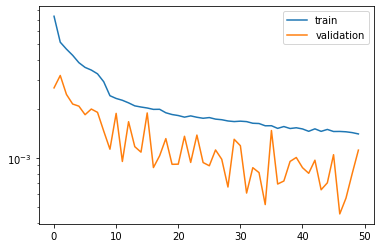

In [29]:
plt.plot(history_thresh2.history["loss"],label="train")
plt.plot(history_thresh2.history["val_loss"],label="validation")
plt.legend()
plt.yscale('log')

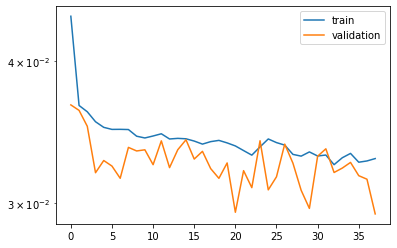

In [48]:
plt.plot(history_thresh4.history["mae"],label="train")
plt.plot(history_thresh4.history["val_mae"],label="validation")
plt.legend()
plt.yscale('log')

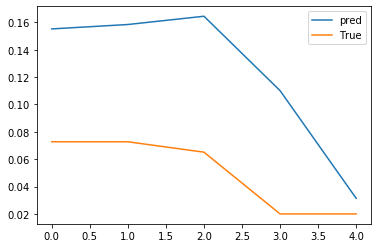

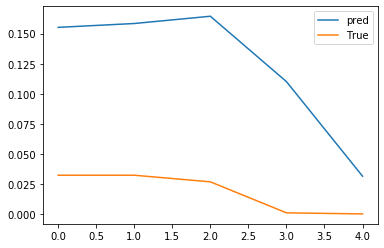

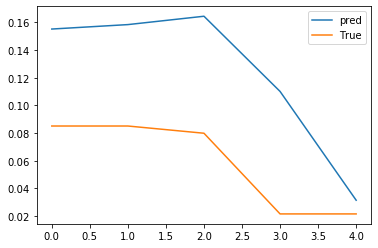

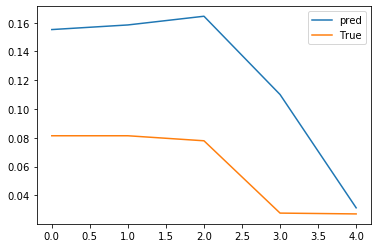

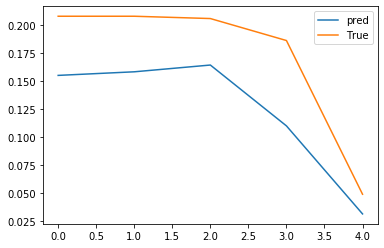

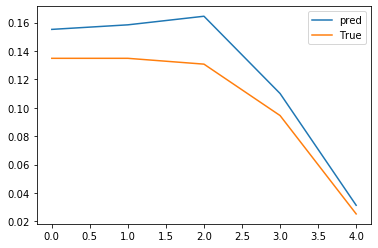

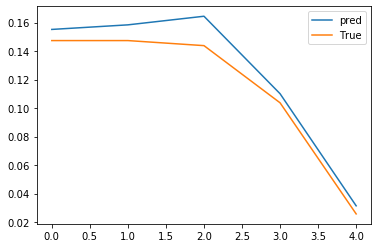

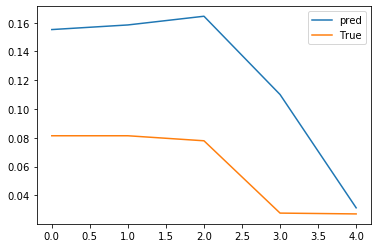

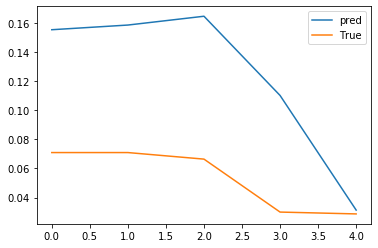

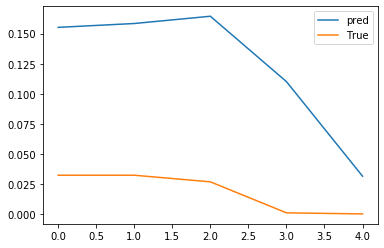

In [32]:
y_pred = image_only_model_5Hg.predict(test_images)
times = 0
for y_pred_i, y_true_i in zip(y_pred, Y_holdout):
    times = times +1 
    plt.plot(y_pred_i, label="pred")
    plt.plot(y_true_i,label="True")
    plt.legend()
    plt.show()
#     if times == 3:
#         plt.show()

# 10 point model

In [ ]:
# dataset for complete operaion
df = df_files[['Sample', 'Image_Location_PostPocess','Image_Location_Threshold','Top_Boundary','Bottom_Boundary']].merge(df_Hg_porosity_10, 
                                                                                  left_on='Sample', right_on='Sample')
Hg = (np.array(df["Ps_new"].tolist())) / 100.
df_train, df_holdout, Y_Train, Y_holdout = train_test_split(df, Hg, shuffle = True, random_state = 12, test_size = 0.1)
thresh_loc_train = np.array(df_train["Image_Location_Threshold"].tolist(), dtype = 'U')
thresh_loc_holdout = np.array(df_holdout["Image_Location_Threshold"].tolist(), dtype = 'U')
X_Train = []
X_Holdout = []
for loc in thresh_loc_train:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train.append(img)
    
for loc in thresh_loc_holdout:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Holdout.append(img)
    
X_Holdout = np.array(X_Holdout)/255

image_only_model_10Hg = build_image_only_model(nfilter = 4, filter_size=3)

In [ ]:
# Test data generated
num = 10
test_generator = ImageDataGenerator(X_Holdout, Y_holdout, df_holdout, 
                         img_diam = 224, batch_size = 1, num_batches = num, 
                         slice_per_image = 1, seed = 2)

test_data = [result for i, result in zip(range(num), test_generator)]

test_images = []
test_poros = []
for img, poros in (test_data):
    test_images.append(img)
    test_poros.append(poros)
    
test_images = np.array(test_images)
test_poros = np.array(test_poros)
test_images = test_images.reshape(len(test_images),test_images.shape[-2],test_images.shape[-1])
test_poros = test_poros.reshape(len(test_images),test_poros.shape[-1])
print("test_images.shape = ",test_images.shape, "test_poros.shape = ",test_poros.shape)

In [ ]:
# initialize the number of epochs and batch size
BS = 25
EPOCHS = 50
VS = 0.15

# construct the training image generator for data augmentation
train_generator = ImageDataGenerator(X_Train, Y_Train, df_train, 
                         img_diam = 224, batch_size = 20, num_batches = BS, 
                         slice_per_image = 10, seed = 10)

validation_generator = ImageDataGenerator(X_Train, Y_Train, df_train, 
                         img_diam = 224, batch_size = 10, num_batches = 5, 
                         slice_per_image = 2, seed = 5)

In [ ]:
file_model = os.path.join(path_Models, 'image_only_model_10Hg.h5')
if not os.path.isfile(file_model):
    open(file_model, 'a').close()
    
checkpoint = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_control = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
callbacks_list = [checkpoint, callbacks_control]

In [ ]:
history_thresh2 = image_only_model_10Hg.fit_generator(train_generator,validation_data = validation_generator, validation_steps = 5,
                        steps_per_epoch = BS,
                        epochs=EPOCHS, callbacks=callbacks_list)

In [ ]:
plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_thresh2.history["loss"],label="Train", linewidth=2)
plt.plot(history_thresh2.history["val_loss"],label="Validation", linewidth=2)
plt.legend(fontsize=18)
plt.ylabel("MSE Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=18)
# plt.savefig("10FittingPointsModel1.png")

In [ ]:
file_model = os.path.join(path_Models, 'image_only_model_10Hg.h5')
image_only_model_10Hg = load_model(file_model)
test_images.shape
y_pred = image_only_model_10Hg.predict(test_images)
print(y_pred.shape)

In [ ]:
numbers = 0
plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
for y_pred_i, y_true_i in zip(y_pred, Y_holdout):
    numbers = numbers +1 
    plt.plot(y_pred_i, label="Predicted Curve " + str(numbers))
    plt.plot(y_true_i,label="Original Curve "+ str(numbers))
    plt.ylabel("Porosity ratio", fontsize=18)
    plt.xlabel("log(Radii)", fontsize=18)
    plt.legend(fontsize=18)
    if numbers == 2:
        break
# plt.savefig("10FittingPointsModel2.png")

# 15 point model

In [ ]:
# dataset for complete operaion
df = df_files[['Sample', 'Image_Location_PostPocess','Image_Location_Threshold','Top_Boundary','Bottom_Boundary']].merge(df_Hg_porosity_15, 
                                                                                  left_on='Sample', right_on='Sample')
Hg = (np.array(df["Ps_new"].tolist())) / 100.
df_train, df_holdout, Y_Train, Y_holdout = train_test_split(df, Hg, shuffle = True, random_state = 12, test_size = 0.1)
thresh_loc_train = np.array(df_train["Image_Location_Threshold"].tolist(), dtype = 'U')
thresh_loc_holdout = np.array(df_holdout["Image_Location_Threshold"].tolist(), dtype = 'U')
X_Train = []
X_Holdout = []
for loc in thresh_loc_train:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train.append(img)
    
for loc in thresh_loc_holdout:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Holdout.append(img)
    
X_Holdout = np.array(X_Holdout)/255

image_only_model_15Hg = build_image_only_model(nfilter = 4, filter_size=3)

In [ ]:
# Test data generated
num = 10
test_generator = ImageDataGenerator(X_Holdout, Y_holdout, df_holdout, 
                         img_diam = 224, batch_size = 1, num_batches = num, 
                         slice_per_image = 1, seed = 2)

test_data = [result for i, result in zip(range(num), test_generator)]

test_images = []
test_poros = []
for img, poros in (test_data):
    test_images.append(img)
    test_poros.append(poros)
    
test_images = np.array(test_images)
test_poros = np.array(test_poros)
test_images = test_images.reshape(len(test_images),test_images.shape[-2],test_images.shape[-1])
test_poros = test_poros.reshape(len(test_images),test_poros.shape[-1])
print("test_images.shape = ",test_images.shape, "test_poros.shape = ",test_poros.shape)

In [ ]:
# initialize the number of epochs and batch size
BS = 25
EPOCHS = 50
VS = 0.15

# construct the training image generator for data augmentation
train_generator = ImageDataGenerator(X_Train, Y_Train, df_train, 
                         img_diam = 224, batch_size = 20, num_batches = BS, 
                         slice_per_image = 10, seed = 10)

validation_generator = ImageDataGenerator(X_Train, Y_Train, df_train, 
                         img_diam = 224, batch_size = 10, num_batches = 5, 
                         slice_per_image = 2, seed = 5)

In [ ]:
file_model = os.path.join(path_Models, 'image_only_model_15Hg.h5')
if not os.path.isfile(file_model):
    open(file_model, 'a').close()
    
checkpoint = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_control = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
callbacks_list = [checkpoint, callbacks_control]

In [ ]:
history_thresh3 = image_only_model_15Hg.fit_generator(train_generator,validation_data = validation_generator, validation_steps = 5,
                        steps_per_epoch = BS,
                        epochs=EPOCHS, callbacks=callbacks_list)

In [ ]:
plt.plot(history_thresh3.history["loss"],label="train")
plt.plot(history_thresh3.history["val_loss"],label="validation")
plt.legend()
plt.yscale('log')

In [ ]:
y_pred = image_only_model_15Hg.predict(test_images)
times = 0
for y_pred_i, y_true_i in zip(y_pred, Y_holdout):
    times = times +1 
    plt.plot(y_pred_i, label="pred")
    plt.plot(y_true_i,label="True")
    plt.legend()
    if times == 2:
        plt.show()

# 500X Images Alone

# Data Preparation Stage

In [ ]:
df_500 = (df_files.loc[df_files['Magnification'] == 500.0])[['Sample','Image_Location_PostPocess','Image_Location_Threshold','Top_Boundary','Bottom_Boundary']]
df_500 = df_500[['Sample', 'Image_Location_PostPocess','Image_Location_Threshold','Top_Boundary','Bottom_Boundary']].merge(df_Hg_porosity_10, 
                                                                                  left_on='Sample', right_on='Sample')

df_500 = df_500.reset_index()
Hg_500 = (np.array(df_500["Ps_new"].tolist())) / 100.

df_500_train, df_500_holdout, Y_Train_Hg_500, Y_Train_Hg_500_holdout = train_test_split(df_500, Hg_500, shuffle = True, random_state = 12, test_size = 0.1)
thresh_loc_train = np.array(df_500_train["Image_Location_Threshold"].tolist(), dtype = 'U')
grey_loc_train = np.array(df_500_train["Image_Location_PostPocess"].tolist(), dtype = 'U')
thresh_loc_holdout = np.array(df_500_holdout["Image_Location_Threshold"].tolist(), dtype = 'U')
grey_loc_holdout = np.array(df_500_holdout["Image_Location_PostPocess"].tolist(), dtype = 'U')

X_Train_thresh_500_train = []
X_Train_grey_500_train = []

X_Train_thresh_500_holdout = []
X_Train_grey_500_holdout = []

for loc in thresh_loc_train:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train_thresh_500_train.append(img)
    
for loc in grey_loc_train:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train_grey_500_train.append(img)
    
for loc in thresh_loc_holdout:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train_thresh_500_holdout.append(img)
    
for loc in grey_loc_holdout:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train_grey_500_holdout.append(img)
    
X_Train_thresh_500_holdout = np.array(X_Train_thresh_500_holdout)/255
X_Train_grey_500_holdout = np.array(X_Train_grey_500_holdout)/255

In [ ]:
image_only_model_500X = build_image_only_model(nfilter = 4, filter_size=3)

In [ ]:
# initialize the number of epochs and batch size
BS = 25
EPOCHS = 100
VS = 5

# construct the training image generator for data augmentation
train_generator = ImageDataGenerator(X_Train_thresh_500_train, Y_Train_Hg_500, df_500_train, 
                         img_diam = 224, batch_size = 20, num_batches = BS, 
                         slice_per_image = 5, seed = 10)

validation_generator = ImageDataGenerator(X_Train_thresh_500_train, Y_Train_Hg_500, df_500_train, 
                         img_diam = 224, batch_size = 10, num_batches = VS, 
                         slice_per_image = 2, seed = 5)


# Test data generated
num = 10
test_generator = ImageDataGenerator(X_Train_thresh_500_holdout, Y_Train_Hg_500_holdout, df_500_holdout, 
                         img_diam = 224, batch_size = 1, num_batches = num, 
                         slice_per_image = 1, seed = 2)

test_data = [result for i, result in zip(range(num), test_generator)]

test_images = []
test_poros = []
for img, poros in (test_data):
    test_images.append(img)
    test_poros.append(poros)
    
test_images = np.array(test_images)
test_poros = np.array(test_poros)
test_images = test_images.reshape(len(test_images),test_images.shape[-2],test_images.shape[-1])
test_poros = test_poros.reshape(len(test_images),test_poros.shape[-1])
print("test_images.shape = ",test_images.shape, "test_poros.shape = ",test_poros.shape)

In [ ]:
file_model = os.path.join(path_Models, 'image_only_model_500X.h5')
if not os.path.isfile(file_model):
    open(file_model, 'a').close()
    
checkpoint = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_control = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
callbacks_list = [checkpoint, callbacks_control]

In [ ]:
history_thresh4 = image_only_model_500X.fit_generator(train_generator, validation_data = validation_generator, validation_steps = VS,
                        steps_per_epoch = BS,
                        epochs=EPOCHS, callbacks=callbacks_list)

In [ ]:
plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_thresh4.history["loss"],label="Train", linewidth=2)
plt.plot(history_thresh4.history["val_loss"],label="Validation", linewidth=2)
plt.legend(fontsize=18)
plt.ylabel("MSE Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=18)
# plt.savefig("image_only_model_500X1.png")

print(signaltonoise(history_thresh4.history["val_loss"]))
print(signaltonoise(history_thresh2.history["val_loss"]))

In [ ]:
y_pred = image_only_model_500X.predict(test_images)
numbers = 0
plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
for y_pred_i, y_true_i in zip(y_pred, Y_holdout):
    numbers = numbers +1 
    plt.plot(y_pred_i, label="Predicted Curve " + str(numbers))
    plt.plot(y_true_i,label="Original Curve "+ str(numbers))
    plt.ylabel("Porosity ratio", fontsize=18)
    plt.xlabel("log(Radii)", fontsize=18)
    plt.legend(fontsize=18)
    if numbers == 2:
        break
# plt.savefig("image_only_model_500X2.png")

# 500X image with cumulative function

In [ ]:
image_only_model_500X_cumulative = build_image_only_model(nfilter = 4, filter_size=3)

In [ ]:
file_model = os.path.join(path_Models, 'image_only_model_500X_cumulative.h5')
if not os.path.isfile(file_model):
    open(file_model, 'a').close()
    
checkpoint = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_control = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
callbacks_list = [checkpoint, callbacks_control]

In [ ]:
# initialize the number of epochs and batch size
BS = 25
EPOCHS = 100
VS = 5

# construct the training image generator for data augmentation
train_generator = ImageDataGenerator(X_Train_thresh_500_train, Y_Train_Hg_500, df_500_train, 
                         img_diam = 224, batch_size = 20, num_batches = BS, 
                         slice_per_image = 5, seed = 10)

validation_generator = ImageDataGenerator(X_Train_thresh_500_train, Y_Train_Hg_500, df_500_train, 
                         img_diam = 224, batch_size = 10, num_batches = VS, 
                         slice_per_image = 2, seed = 5)


# Test data generated
num = 10
test_generator = ImageDataGenerator(X_Train_thresh_500_holdout, Y_Train_Hg_500_holdout, df_500_holdout, 
                         img_diam = 224, batch_size = 1, num_batches = num, 
                         slice_per_image = 1, seed = 2)

test_data = [result for i, result in zip(range(num), test_generator)]

test_images = []
test_poros = []
for img, poros in (test_data):
    test_images.append(img)
    test_poros.append(poros)
    
test_images = np.array(test_images)
test_poros = np.array(test_poros)
test_images = test_images.reshape(len(test_images),test_images.shape[-2],test_images.shape[-1])
test_poros = test_poros.reshape(len(test_images),test_poros.shape[-1])
print("test_images.shape = ",test_images.shape, "test_poros.shape = ",test_poros.shape)

In [ ]:
history_thresh5 = image_only_model_500X_cumulative.fit_generator(train_generator, validation_data = validation_generator, validation_steps = VS,
                        steps_per_epoch = BS,
                        epochs=EPOCHS, callbacks=callbacks_list)

In [ ]:
plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_thresh5.history["loss"],label="Train", linewidth=2)
plt.plot(history_thresh5.history["val_loss"],label="Validation", linewidth=2)
plt.legend(fontsize=18)
plt.ylabel("MSE Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=18)
# plt.savefig("image_only_model_500X_cumulative1.png")

print(signaltonoise(history_thresh5.history["val_loss"]))

In [ ]:
plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_thresh5.history["loss"],label="Train", linewidth=2)
plt.plot(history_thresh5.history["mae"],label="MAE Validation", linewidth=2)
plt.legend(fontsize=18)
plt.ylabel("MAE Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=18)
# plt.savefig("image_only_model_500X_cumulative3.png")

In [ ]:
y_pred = image_only_model_500X_cumulative.predict(test_images)
numbers = 0
plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
for y_pred_i, y_true_i in zip(y_pred, Y_holdout):
    numbers = numbers +1 
    plt.plot(y_pred_i, label="Predicted Curve " + str(numbers))
    plt.plot(y_true_i,label="Original Curve "+ str(numbers))
    plt.ylabel("Porosity ratio", fontsize=18)
    plt.xlabel("log(Radii)", fontsize=18)
    plt.legend(fontsize=18)
    if numbers == 3:
        break
# plt.savefig("image_only_model_500X_cumulative2.png")

# 2000X images with cumulative function

In [ ]:
# First we get all the currosponding images...join with their modified porosimetry curves..then take out the Y part which has the same size
df_2000 = (df_files.loc[df_files['Magnification'] == 2000.0])[['Sample','Image_Location_PostPocess','Image_Location_Threshold','Top_Boundary','Bottom_Boundary']]
df_2000 = df_2000[['Sample', 'Image_Location_PostPocess','Image_Location_Threshold','Top_Boundary','Bottom_Boundary']].merge(df_Hg_porosity_10, 
                                                                                  left_on='Sample', right_on='Sample')
df_2000 = df_2000.reset_index()
Hg_2000 = (np.array(df_2000["Ps_new"].tolist())) / 100.
#******************************************************

df_2000_train, df_2000_holdout, Y_Train_Hg_2000, Y_Train_Hg_2000_holdout = train_test_split(df_2000, Hg_2000, shuffle = True, random_state = 12, test_size = 0.1)
thresh_loc_train = np.array(df_2000_train["Image_Location_Threshold"].tolist(), dtype = 'U')
grey_loc_train = np.array(df_2000_train["Image_Location_PostPocess"].tolist(), dtype = 'U')
thresh_loc_holdout = np.array(df_2000_holdout["Image_Location_Threshold"].tolist(), dtype = 'U')
grey_loc_holdout = np.array(df_2000_holdout["Image_Location_PostPocess"].tolist(), dtype = 'U')
#******************************************************

# Training and holdout/test data
X_Train_thresh_2000_train = []
X_Train_grey_2000_train = []

X_Train_thresh_2000_holdout = []
X_Train_grey_2000_holdout = []

for loc in thresh_loc_train:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train_thresh_2000_train.append(img)
    
for loc in grey_loc_train:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train_grey_2000_train.append(img)
    
for loc in thresh_loc_holdout:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train_thresh_2000_holdout.append(img)
    
for loc in grey_loc_holdout:
    img = cv2.imread(str(loc), cv2.IMREAD_UNCHANGED) 
    X_Train_grey_2000_holdout.append(img)
    
# normalising holdout
X_Train_thresh_2000_holdout = np.array(X_Train_thresh_2000_holdout)/255
X_Train_grey_2000_holdout = np.array(X_Train_grey_2000_holdout)/255
print("Completed data extraction successfully..")

In [ ]:
image_only_model_2000X_cumulative = build_image_only_model(nfilter = 4, filter_size=3)

In [ ]:
# initialize the number of epochs and batch size
BS = 25
EPOCHS = 100
VS = 0.15

# construct the training image generator for data augmentation
train_generator = ImageDataGenerator(X_Train_thresh_2000_train, Y_Train_Hg_2000, df_2000_train, 
                         img_diam = 224, batch_size = 20, num_batches = BS, 
                         slice_per_image = 5, seed = 10)

validation_generator = ImageDataGenerator(X_Train_thresh_2000_train, Y_Train_Hg_2000, df_2000_train,
                         img_diam = 224, batch_size = 10, num_batches = 5, 
                         slice_per_image = 2, seed = 5)

# Test data generated
test_num = 10
test_generator = ImageDataGenerator(X_Train_thresh_2000_holdout, Y_Train_Hg_2000_holdout, df_2000_holdout, 
                         img_diam = 224, batch_size = 1, num_batches = test_num, 
                         slice_per_image = 1, seed = 2)
test_data = [result for i, result in zip(range(num), test_generator)]
test_images = []
test_poros = []
for img, poros in (test_data):
    test_images.append(img)
    test_poros.append(poros)
    
test_images = np.array(test_images)
test_poros = np.array(test_poros)
test_images = test_images.reshape(len(test_images),test_images.shape[-2],test_images.shape[-1])
test_poros = test_poros.reshape(len(test_images),test_poros.shape[-1])
print("test_images.shape = ",test_images.shape, "test_poros.shape = ",test_poros.shape)

In [ ]:
file_model = os.path.join(path_Models, 'image_only_model_2000X_cumulative.h5')
if not os.path.isfile(file_model):
    open(file_model, 'a').close()
    
checkpoint = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_control = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
callbacks_list = [checkpoint, callbacks_control]

In [ ]:
history_thresh6 = image_only_model_2000X_cumulative.fit_generator(train_generator, validation_data = validation_generator, validation_steps = VS,
                        steps_per_epoch = BS, epochs=EPOCHS, callbacks=callbacks_list)

In [ ]:
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_thresh6.history["loss"],label="Train", linewidth=2)
plt.plot(history_thresh6.history["val_loss"],label="MSE Validation", linewidth=2)
plt.legend(fontsize=18)
plt.ylabel("MSE Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=18)
# plt.savefig("image_only_model_2000X_cumulative1.png")

print(signaltonoise(history_thresh6.history["val_loss"]))

In [ ]:
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_thresh6.history["loss"],label="2000X images Train", linewidth=2)
plt.plot(history_thresh6.history["mae"],label="MAE 2000X images Validation", linewidth=2)

plt.plot(history_thresh5.history["loss"],label="500X images Train", linewidth=2)
plt.plot(history_thresh5.history["mae"],label="MAE 500X images Validation", linewidth=2)

plt.legend(fontsize=18)
plt.ylabel("MAE Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=18)
# plt.savefig("image_only_model_X_cumulative3.png")

print(signaltonoise(history_thresh6.history["mae"]))

In [ ]:
y_pred = image_only_model_2000X_cumulative.predict(test_images)
numbers = 0
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
for y_pred_i, y_true_i in zip(y_pred, Y_holdout):
    numbers = numbers +1 
    plt.plot(y_pred_i, label="Predicted Curve " + str(numbers))
    plt.plot(y_true_i,label="Original Curve "+ str(numbers))
    plt.ylabel("Porosity ratio", fontsize=18)
    plt.xlabel("log(Radii)", fontsize=18)
    plt.legend(fontsize=18)
    if numbers == 2:
        break
# plt.savefig("image_only_model_2000X_cumulative2.png")

# 500X images with greyscale images

In [ ]:
image_only_model_500X_cumulative_greyscale = build_image_only_model(nfilter = 4, filter_size=3)

In [ ]:
# Test data generated
num = 10
test_generator = ImageDataGenerator(X_Train_grey_500_holdout, Y_Train_Hg_500_holdout, df_500_holdout, 
                         img_diam = 224, batch_size = 1, num_batches = num, 
                         slice_per_image = 1, seed = 2)

test_data = [result for i, result in zip(range(num), test_generator)]

test_images = []
test_poros = []
for img, poros in (test_data):
    test_images.append(img)
    test_poros.append(poros)
    
test_images = np.array(test_images)
test_poros = np.array(test_poros)
test_images = test_images.reshape(len(test_images),test_images.shape[-2],test_images.shape[-1])
test_poros = test_poros.reshape(len(test_images),test_poros.shape[-1])
print("test_images.shape = ",test_images.shape, "test_poros.shape = ",test_poros.shape)

In [ ]:
file_model = os.path.join(path_Models, 'image_only_model_500X_cumulative_greyscale.h5')
if not os.path.isfile(file_model):
    open(file_model, 'a').close()
    
checkpoint = ModelCheckpoint(file_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_control = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
callbacks_list = [checkpoint, callbacks_control]

In [ ]:
# initialize the number of epochs and batch size
BS = 25
EPOCHS = 100
VS = 0.15

# construct the training image generator for data augmentation
train_generator = ImageDataGenerator(X_Train_grey_500_train, Y_Train_Hg_500, df_500_train, 
                         img_diam = 224, batch_size = 20, num_batches = BS, 
                         slice_per_image = 5, seed = 10)

validation_generator = ImageDataGenerator(X_Train_grey_500_train, Y_Train_Hg_500, df_500_train, 
                         img_diam = 224, batch_size = 10, num_batches = 5, 
                         slice_per_image = 2, seed = 5)

# Test data generated
test_num = 10
test_generator = ImageDataGenerator(X_Train_grey_500_holdout, Y_Train_Hg_500_holdout, df_500_holdout, 
                         img_diam = 224, batch_size = 1, num_batches = test_num, 
                         slice_per_image = 1, seed = 2)
test_data = [result for i, result in zip(range(num), test_generator)]
test_images = []
test_poros = []
for img, poros in (test_data):
    test_images.append(img)
    test_poros.append(poros)
    
test_images = np.array(test_images)
test_poros = np.array(test_poros)
test_images = test_images.reshape(len(test_images),test_images.shape[-2],test_images.shape[-1])
test_poros = test_poros.reshape(len(test_images),test_poros.shape[-1])
print("test_images.shape = ",test_images.shape, "test_poros.shape = ",test_poros.shape)

In [ ]:
history_grey7_2 = image_only_model_500X_cumulative_greyscale.fit_generator(train_generator, validation_data = validation_generator, validation_steps = VS,
                        steps_per_epoch = BS, epochs=EPOCHS, callbacks=callbacks_list)

In [ ]:
# history_grey7_total = []
# history_grey7_total.append(history_grey7)

In [ ]:
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(history_grey7.history["loss"],label="Train", linewidth=2)
plt.plot(history_grey7.history["mae"],label="MAE Validation", linewidth=2)
plt.legend(fontsize=18)
plt.ylabel("MSE Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=18)
plt.savefig("image_only_model_500X_cumulative1_grey.png")

print(signaltonoise(history_grey7_2.history["val_loss"]))

In [ ]:
y_pred = image_only_model_500X_cumulative_greyscale.predict(test_images)
numbers = 0
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
for y_pred_i, y_true_i in zip(y_pred, Y_holdout):
    numbers = numbers +1 
    plt.plot(y_pred_i, label="Predicted Curve " + str(numbers))
    plt.plot(y_true_i,label="Original Curve "+ str(numbers))
    plt.ylabel("Porosity ratio", fontsize=18)
    plt.xlabel("log(Radii)", fontsize=18)
    plt.legend(fontsize=18)
    if numbers == 2:
        break
# plt.savefig("image_only_model_2000X_cumulative2.png")